In [1]:
#This is where we will write our project 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [95]:
%matplotlib inline
import numpy as np
import scipy as sp
import sympy as sm
import matplotlib.pyplot as plt
import ipywidgets as widgets
import pylab

#We initiate our printing as nice equations, using the sympy package 
sm.init_printing(use_unicode=True)


In [96]:
#defining all variables as symby symbols 
q1 = sm.symbols('q_1')
q2 = sm.symbols('q_2')
c = sm.symbols('c')
a = sm.symbols('a')
b = sm.symbols("b")
pi1 = sm.symbols('pi_1')
pi2 = sm.symbols('pi_2')

#Now we define the equations describing the relationship between the two firms 
#prices (p), costs(c), someting(a), revenue(pi) and quantity(q).
p1 = (a-b*(q1+q2))
p2 = (a-b*(q1+q2))
pi1 =(p1*q1-c*q1)
pi2 = (p2*q2-c*q2)


In order to solve the cournot-quilibrium, we maximise the the quantity firm 1 produces

In [97]:

#Take the derivative wrt. to q1 and q2 respecticly
#to get the optimal quantity of firm 1 and firm 2:

foc1=sm.diff(pi1,q1)
foc1

foc2=sm.diff(pi2,q2)
foc2

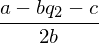

In [98]:
# We solve the first firms equation equal to 0
sol1= sm.solve(sm.Eq(foc1,0),q1)[0]
sol1

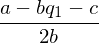

In [99]:
# We solve the second firms equation equal to 0
sol2= sm.solve(sm.Eq(foc2,0),q2)[0]
sol2


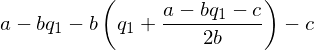

In [100]:
#We then substitute the q2 in equation 1
sol1_subs = foc1.subs(q2,sol2)
sol1_subs



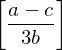

In [101]:
#then we solve the first equation for the quantity
sol1_subs_solve = sm.solve(sm.Eq(sol1_subs,0),q1)
sol1_subs_solve

The optimal quantity for a firm to produce, that is the Cournot-Equilibrium, is described a the cost minus the (whatever a is) 

In [285]:
def reaction(a, b, cost, q_other):
    quantity = (a-b*q_other - cost)/2*b
    plt.plot(quantity,q_other)
    plt.xlabel("Firm 1 quatity")
    plt.ylabel("Firm 2 quatity")
    plt.legend(["Firm 1's reaction curve"])


    return quantity

def optimal(a, b, cost):
    equilibrium = (a-cost)/3*b
    
    return equilibrium

def reactiontest(q_other):
    quantity = (100-1*q_other-1)/2*1

    return quantity

In [286]:
x = np.linspace(0, 100, 1000)

AttributeError: module 'matplotlib.pyplot' has no attribute 'pyplot'

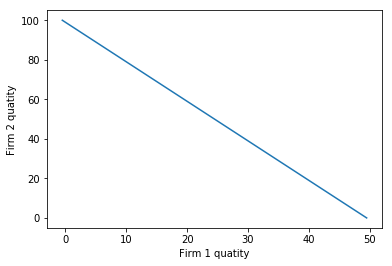

In [287]:
plt.plot(x,reaction(100,1,1,x))

In [263]:
widgets.interactive(reaction, a=widgets.IntSlider(min=0,max=100,step=5,value=100),b=widgets.IntSlider(min=0,max=3,step=0.5,value=1),cost=widgets.IntSlider(min=0,max=5,step=0.5,value=1),
                        q_other=widgets.IntSlider(min=0,max=100,step=5,value=50))


interactive(children=(IntSlider(value=100, description='a', step=5), IntSlider(value=1, description='b', max=3…

interactive(children=(Output(),), _dom_classes=('widget-interact',))